In [160]:
# Mengimport modul yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
# Membaca data dari file Excel
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/_Tugas_Akhir/data/data_panel.xlsx')

In [162]:
# Memisahkan variabel independen
X = data[['ID_dep', 'Year', 'Uso_Cabina_porc', 'Tel_fija_und',
          'Tel_movil_unid', 'Tel_public', 'Uso_inter_porc',
          'Sub_internet_fijo_und', 'VAB_Tel_miles_2007base', 'PBI_regional_miles',
          'Hogar_1_radio_porc', 'Hogar_1_tv_porc', 'Hogar_con_cable_porc',
          'Hogar_1_compu_porc', 'Compus_por_muni_unid']]

# Memisahkan variabel dependen untuk throughput pengguna
y_pengguna = data['Throughput_DL_rata_rata_pengguna']

In [163]:
# Mengonversi nilai target untuk throughput pengguna menjadi biner
y_pengguna_binary = (y_pengguna > 0.5).astype(int)

In [164]:
# Memisahkan data training dan testing untuk throughput pengguna
X_train_pengguna, X_test_pengguna, y_pengguna_train, y_pengguna_test = train_test_split(
    X, y_pengguna_binary, test_size=0.2, random_state=42
)

In [165]:
# Standarisasi data untuk MLP throughput pengguna
scaler_pengguna = StandardScaler()
X_train_pengguna_scaled = scaler_pengguna.fit_transform(X_train_pengguna)
X_test_pengguna_scaled = scaler_pengguna.transform(X_test_pengguna)

In [166]:
# Model MLP - Throughput Pengguna
model_mlp_pengguna = Sequential([
    Dense(16, input_dim=X_train_pengguna_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_mlp_pengguna.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [167]:
# Melatih model MLP throughput pengguna
history_pengguna = model_mlp_pengguna.fit(X_train_pengguna_scaled, y_pengguna_train, epochs=500, batch_size=42, validation_data=(X_test_pengguna_scaled, y_pengguna_test), verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 26ms/step - loss: 0.6096 - accuracy: 0.5965 - val_loss: 0.6464 - val_accuracy: 0.4483
Epoch 2/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6291 - accuracy: 0.6009 - val_loss: 0.6418 - val_accuracy: 0.4828
Epoch 3/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6000 - accuracy: 0.6754 - val_loss: 0.6373 - val_accuracy: 0.5000
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6106 - accuracy: 0.6535 - val_loss: 0.6327 - val_accuracy: 0.5172
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6033 - accuracy: 0.6491 - val_loss: 0.6282 - val_accuracy: 0.5517
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.5938 - accuracy: 0.6798 - val_loss: 0.6237 - val_accuracy: 0.5517
Epoch 7/500
6/6 [==============================] - 0s 10ms/step - loss: 0.5841 - accuracy: 0.7018 - val_loss: 0.6193 - val_accuracy: 0.5517
Epoch 8/500
6/6 [=====

In [168]:
# Evaluasi model MLP throughput pengguna
y_pred_pengguna = model_mlp_pengguna.predict(X_test_pengguna_scaled)
y_pred_classes_pengguna = (y_pred_pengguna > 0.5).astype(int)

2/2 [==============================] - 0s 3ms/step


In [169]:
# Menampilkan hasil evaluasi untuk throughput pengguna
accuracy_pengguna = accuracy_score(y_pengguna_test, y_pred_classes_pengguna)
mse_pengguna = mean_squared_error(y_pengguna_test, y_pred_pengguna)
mae_pengguna = mean_absolute_error(y_pengguna_test, y_pred_pengguna)

print("\n1. Test Accuracy - Throughput Pengguna:", accuracy_pengguna)
print("2. Mean Squared Error (MSE) - Throughput Pengguna:", mse_pengguna)
print("3. Mean Absolute Error (MAE) - Throughput Pengguna:", mae_pengguna)


1. Test Accuracy - Throughput Pengguna: 1.0
2. Mean Squared Error (MSE) - Throughput Pengguna: 5.160488525599123e-05
3. Mean Absolute Error (MAE) - Throughput Pengguna: 0.004554725926497887


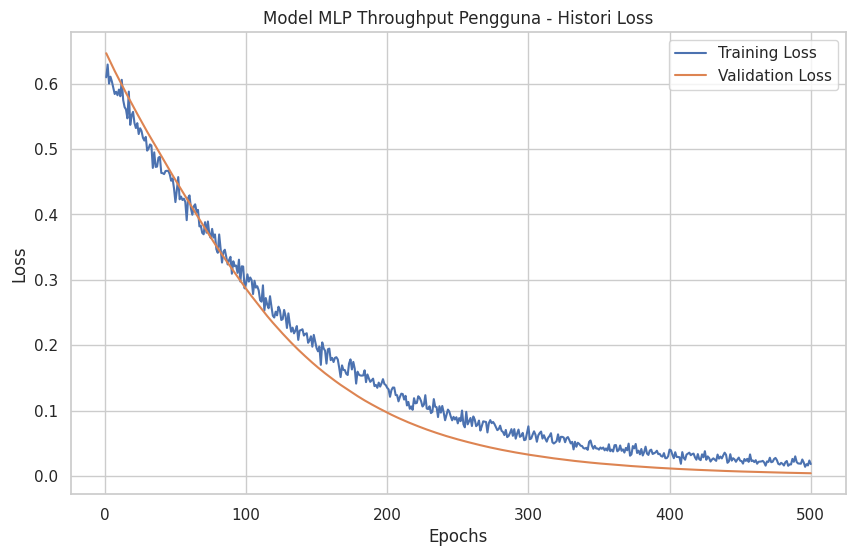

In [170]:
# Plot histori loss menggunakan seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(history_pengguna.history['loss']) + 1), y=history_pengguna.history['loss'], label='Training Loss')
sns.lineplot(x=range(1, len(history_pengguna.history['val_loss']) + 1), y=history_pengguna.history['val_loss'], label='Validation Loss')
plt.title('Model MLP Throughput Pengguna - Histori Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# THROUGHPUT PER SEL

---



In [187]:
# Memisahkan variabel dependen untuk throughput per sel
y_sel = data['Throughput_DL_rata_rata_sel']

In [188]:
# Mengonversi nilai target untuk throughput per sel menjadi biner
y_sel_binary = (y_sel > 0.5).astype(int)

In [189]:
# Memisahkan data training dan testing untuk throughput per sel
X_train_sel, X_test_sel, y_sel_train, y_sel_test = train_test_split(
    X, y_sel_binary, test_size=0.2, random_state=42
)

In [190]:
# Standarisasi data untuk MLP throughput per sel
scaler_sel = StandardScaler()
X_train_sel_scaled = scaler_sel.fit_transform(X_train_sel)
X_test_sel_scaled = scaler_sel.transform(X_test_sel)

In [191]:
# Model MLP - Throughput per Sel
model_mlp_sel = Sequential([
    Dense(16, input_dim=X_train_sel_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model_mlp_sel.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

In [192]:
# Melatih model MLP throughput per sel
history_sel = model_mlp_sel.fit(X_train_sel_scaled, y_sel_train, epochs=450, batch_size=32, validation_data=(X_test_sel_scaled, y_sel_test), verbose=1)

Epoch 1/450
8/8 [==============================] - 1s 20ms/step - loss: 0.6406 - accuracy: 0.6754 - val_loss: 0.6189 - val_accuracy: 0.6897
Epoch 2/450
8/8 [==============================] - 0s 4ms/step - loss: 0.6466 - accuracy: 0.6491 - val_loss: 0.6184 - val_accuracy: 0.6897
Epoch 3/450
8/8 [==============================] - 0s 7ms/step - loss: 0.6553 - accuracy: 0.6096 - val_loss: 0.6179 - val_accuracy: 0.7069
Epoch 4/450
8/8 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.6184 - val_loss: 0.6174 - val_accuracy: 0.7069
Epoch 5/450
8/8 [==============================] - 0s 4ms/step - loss: 0.6518 - accuracy: 0.6316 - val_loss: 0.6168 - val_accuracy: 0.7069
Epoch 6/450
8/8 [==============================] - 0s 4ms/step - loss: 0.6481 - accuracy: 0.6491 - val_loss: 0.6163 - val_accuracy: 0.7069
Epoch 7/450
8/8 [==============================] - 0s 4ms/step - loss: 0.6834 - accuracy: 0.5965 - val_loss: 0.6158 - val_accuracy: 0.7069
Epoch 8/450
8/8 [=========

In [193]:
# Evaluasi model MLP throughput per sel
y_pred_sel = (model_mlp_sel.predict(X_test_sel_scaled) > 0.5).astype(int)

2/2 [==============================] - 0s 5ms/step


In [194]:
# Additional metrics for throughput per sel
mse_sel = mean_squared_error(y_sel_test, y_pred_sel)
mae_sel = mean_absolute_error(y_sel_test, y_pred_sel)

In [195]:
# Menampilkan hasil evaluasi untuk throughput per sel
print("\nMLP Metrics - Throughput per Sel:")
print(f"1. Test Accuracy: {accuracy_score(y_sel_test, y_pred_sel)}")
print(f"2. Mean Squared Error (MSE): {mse_sel}")
print(f"3. Mean Absolute Error (MAE): {mae_sel}")


MLP Metrics - Throughput per Sel:
1. Test Accuracy: 0.9655172413793104
2. Mean Squared Error (MSE): 0.034482758620689655
3. Mean Absolute Error (MAE): 0.034482758620689655


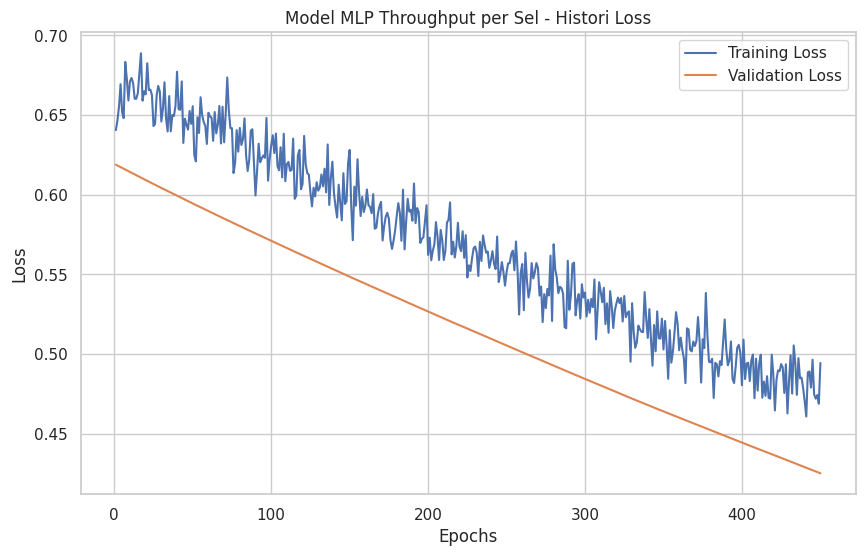

In [196]:
# Plot histori loss menggunakan seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(history_sel.history['loss']) + 1), y=history_sel.history['loss'], label='Training Loss')
sns.lineplot(x=range(1, len(history_sel.history['val_loss']) + 1), y=history_sel.history['val_loss'], label='Validation Loss')
plt.title('Model MLP Throughput per Sel - Histori Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()